<a href="https://colab.research.google.com/github/jbiancamano/Projects/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Justin Biancamano
# Midterm
# CSC/DSP 310

In [ ]:
# preamble to be able to run notebooks in Colab
from google.colab import drive
import sys

# mount the drive
drive.mount('/content/drive') 

# useful folders
notes_home = "/content/drive/Shared drives/CSC310/ds/notes/"
user_home = "/content/drive/My Drive/"
    
# insert the notes folder into the path so we can include assets modules etc
sys.path.insert(1,notes_home) 


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from assets.confint import classification_confint
from sklearn.metrics import confusion_matrix


## **I. Data Set**

In [ ]:
# get data
df = pd.read_csv("/content/drive/Shared drives/CSC310/credit_predict.csv")
df.head(n=10)

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor
5,80.180,8047,4,77,10,0,fair
6,20.996,3388,2,37,12,1,poor
7,71.408,7114,2,87,9,0,poor
8,15.125,3300,5,66,13,1,poor
9,71.061,6819,3,41,19,1,poor


### In this case, the target variable is "Rating_Label" and all other variables are independent variables

In [ ]:
# Split the data
# Drop Rating_Label to get a dataframe of the independent variables
features_df = df.drop(['Rating_Label'], axis=1)
features_df.head(n=10)

,Income,Limit,Cards,Age,Education,Gender_Val
0,14.891,3606,2,34,11,0
1,106.025,6645,3,82,15,1
2,104.593,7075,4,71,11,0
3,148.924,9504,3,36,11,1
4,55.882,4897,2,68,16,0
5,80.180,8047,4,77,10,0
6,20.996,3388,2,37,12,1
7,71.408,7114,2,87,9,0
8,15.125,3300,5,66,13,1
9,71.061,6819,3,41,19,1


In [ ]:
# Create a dataframe to store the dependent variable
target_df = pd.DataFrame(df['Rating_Label'])
target_df.head(n=10)

,Rating_Label
0,poor
1,poor
2,poor
3,fair
4,poor
5,fair
6,poor
7,poor
8,poor
9,poor


## **II. Preliminary Analysis**
### How many independent variables are there?

In [ ]:
features_df.columns

Index(['Income', 'Limit', 'Cards', 'Age', 'Education', 'Gender_Val'], dtype='object')

There are six independent variables 'Income', 'Limit', 'Cards', 'Age', 'Education', and 'Gender_Val'. 

### Report basic descriptive statistics (min, max, mean) for each independent variable

In [ ]:
features_df.describe()

,Income,Limit,Cards,Age,Education,Gender_Val
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,2.957500,55.667500,13.450000,0.517500
std,35.244273,2308.198848,1.371275,17.249807,3.125207,0.500319
min,10.354000,855.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,2.000000,41.750000,11.000000,0.000000
50%,33.115500,4622.500000,3.000000,56.000000,14.000000,1.000000
75%,57.470750,5872.750000,4.000000,70.000000,16.000000,1.000000
max,186.634000,13913.000000,9.000000,98.000000,20.000000,1.000000


The 'Income' and 'Limit' variable are both positively skewed. 'Cards', 'Gender_Val', and 'Education' are slightly negatively skewed. 'Age' is pretty much symmetric. 'Gender_Val' is a dummy variable so it is good that the mean is around 0.5, so the amount of men and women are almost almost equal in this data.  'Limit' has the highest mean but its standard deviation suggests that the max value is an outlier. The standard deviation for 'Income' also suggests that there are some outliers. 
### Determine if each independent variable is multi-modal or not and report.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


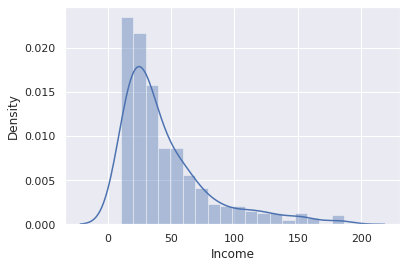

In [ ]:
sns.distplot(features_df.loc[:, 'Income'], hist=True, kde=True, bins=None)

'Income' Is unimodal and positively skewed with a peak between 20 and 40. The grpah verifies the prediction earlier that there is an outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


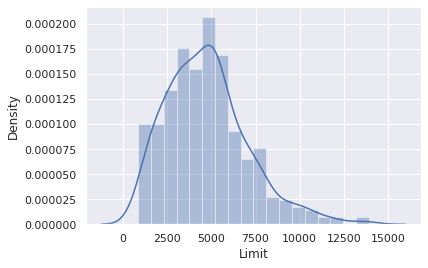

In [ ]:
sns.distplot(features_df.loc[:, 'Limit'], hist=True, kde=True, bins=None)

'Limit' is unimodal and positively skewed with the peak somewhere around 5000. The graph verifies the prediciton that there is an outlier. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


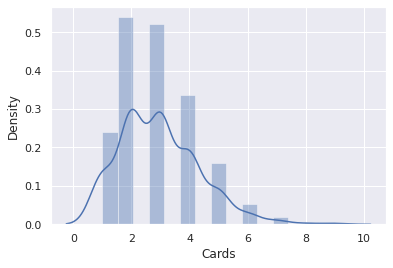

In [ ]:
sns.distplot(features_df.loc[:, 'Cards'], hist=True, kde=True, bins=None)

'Cards' is multimodal with peaks at 2 and 3. It looks positively skewed from the graph, but it is really either symmetric or barely negatively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


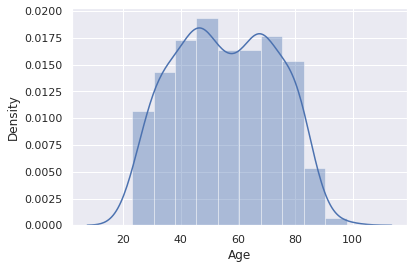

In [ ]:
sns.distplot(features_df.loc[:, 'Age'], hist=True, kde=True, bins=None)

'Age' is multimodal with peaks at about 50 and 70. The distribution is pretty much symmetric

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


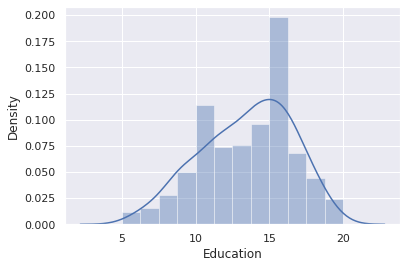

In [ ]:
sns.distplot(features_df.loc[:, 'Education'], hist=True, kde=True, bins=None)

'Education' is unimodal and negatively skewed with a peak at about 15

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


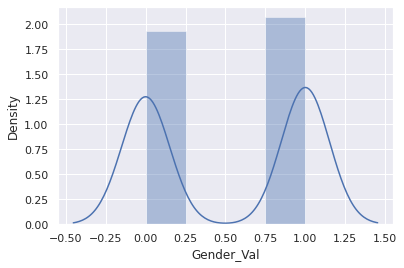

In [ ]:
sns.distplot(features_df.loc[:, 'Gender_Val'], hist=True, kde=True, bins=None)

'Age' is unimodal and this is obvoiuos because there are only two options for the variable 0 and 1, so obvoiously that is where the peaks are as well. The data is pretty much symmetric because hopefully their would be a balance between men and women for an accurate study.

### Use scatter plots to determine if there are interesting relationships between variables or if observations in data set form clusters.

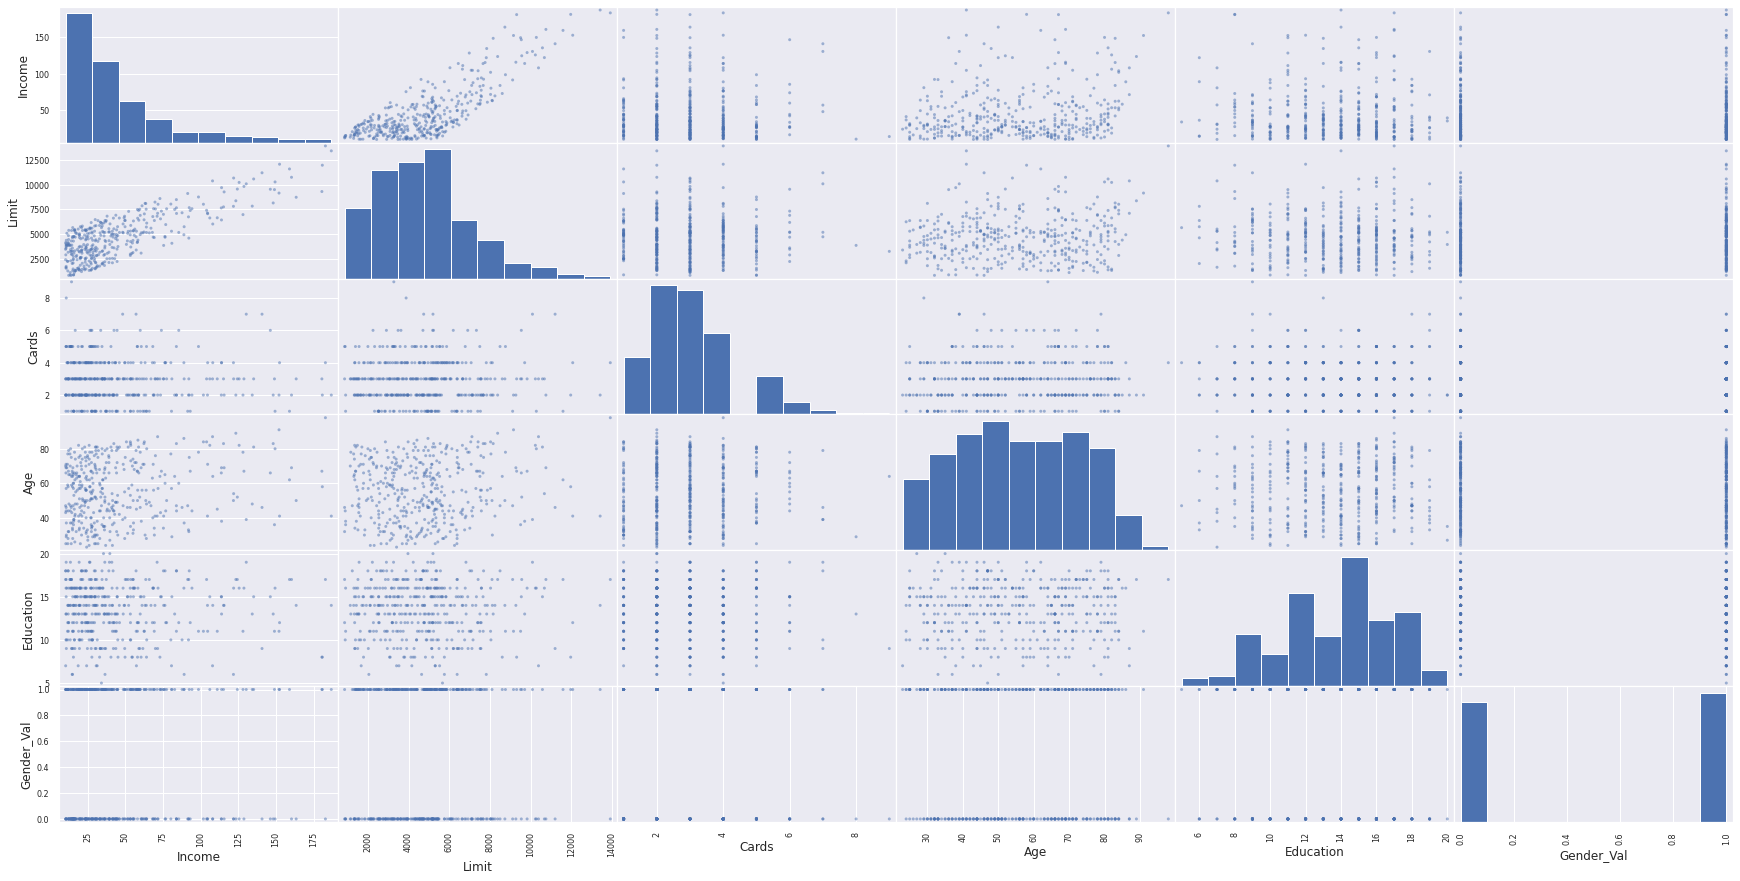

In [ ]:
null = pd.plotting.scatter_matrix(features_df, figsize=[30,15])

The most noticeable relationship is there apprears to be a possitive linear relationship between 'Income' and 'Limit'. For 'Gender_Val" we can see the scatterplots appear to be balanced for both genders. So it appears as though gender does not seem to have a significant relationship with the other variables. Same goes with 'Age'. All the different variables plotted with 'Age' seem to show no relationship which suggests that 'Age' is also not a significant predictor. 'Age' has a weak positive relationship with 'Income' and 'Limit'. This makes sense because the older you get typically the more money you make/the more wealth you accumulate.

### Determine how many labels there are in the **dependent** variable.

In [ ]:
target_df.value_counts()

Rating_Label
poor            358
fair             27
good              9
very good         6
dtype: int64

There are 400 observations in total. If we were interested in the relative frequency we could see that 89.5% of ratings were "poor", 6.75% were "fair", 2.25% were "good", and 1.5% were "very good". There are 4 labels and their is quite a disparity between them. Almost 90% of people picked "poor" and the remaining 10% are either "fair", "good", "very good".

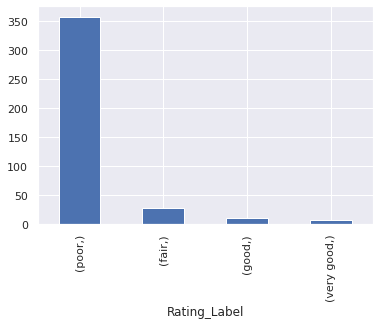

In [ ]:
target_df.value_counts().plot(kind='bar')

### Is this a balanced classification problem? If yes, why? If no, why not?
This is not a balanced classification problem because there is a significant disparity between the amount of "poor" ratings and the rest of the ratings. As I said before, almost 90% of the ratings are "poor" and the remaing three options make up only 10% of the total ratings. 
## **III. Model Building**
### Find the best possible decision tree model (hint: cross-validated accuracy using grid search)

In [ ]:
# Look at the full model to get a better idea of all the trends
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df, target_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_print(dtree, features_df)

if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then if Limit =< 7502.5: 
  |  |  |  |then fair
  |  |  |  |else if Education =< 12.5: 
  |  |  |  |  |then if Income =< 66.8759994506836: 
  |  |  |  |  |  |then poor
  |  |  |  |  |  |else fair
  |  |  |  |  |else poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then if Limit =< 9956.0: 
  |  |  |  |then if Limit =< 9764.0: 
  |  |  |  |  |then good
  |  |  |  |  |else fair
  |  |  |  |else good
  |  |  |else very good
<---------------->
Tree Depth:  6


In [ ]:
# Set up the gird search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # Searches all possible max depths from 1 to 10
    'criterion': ['entropy', 'gini']
}
grid = GridSearchCV(model, param_grid, cv=5)

# Run the grid search
grid.fit(features_df, target_df)

# Print the best parameters
print("Best paramters: {}".format(grid.best_params_))

# Print the best decision tree model
print("Best tree:")
best_tree = tree_print(grid.best_estimator_,features_df)

# Calculate accuracy
predict_target = grid.best_estimator_.predict(features_df)
acc = accuracy_score(target_df, predict_target)

# Print the the accuracy
print("Accuracy: {:3.2f}".format(acc))

Best paramters: {'criterion': 'entropy', 'max_depth': 3}
Best tree:
if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then good
  |  |  |else very good
<------->
Tree Depth:  3
Accuracy: 0.98


### What are the best hyper-parameters?
We use grid search to get the best hyper-parameters which are 'criterion': 'entropy' and 'max_depth': 3
### Print the best tree

In [ ]:
tree_print(grid.best_estimator_,features_df)

if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then good
  |  |  |else very good
<------->
Tree Depth:  3


### Comment on the best tree model.  Any surprises?  Is it intuitive or has it revealed something that is perhaps unusual? Can you relate the tree model back to graphs and scatter plots? (Hint: use the top 2 or 3 variables from the tree in scatter plots, use the Seaborn library with colors for various labels to see clusters better)
The scatter matrix showed a positive relationship between 'Income' and 'Limit' and that was the most noticeable trend. It makes sense that the higher the 'Limit' value the higher the rating value. Its interesting to note that although the best decision tree has a depth of 3 it is really only concerned with one variable: 'Limit'. Looking back at the histogram of 'Limit'We can see that the peaks which are around the lowest possible values for 'Limit' are significantly higher than all the other bins of the histogram. This is interesting to note because there is also significantly more "poor" ratingsthan any other rating which suggest that the model understands the trends. 

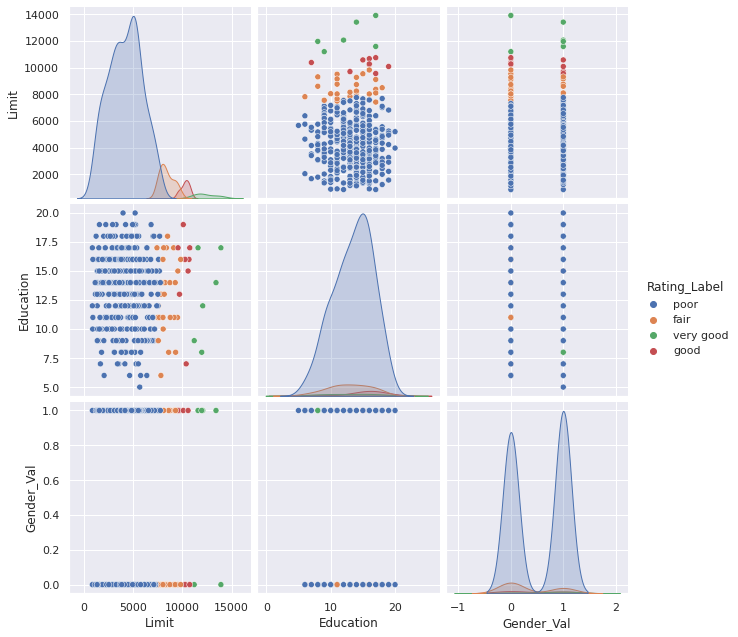

In [ ]:
sns.pairplot(df, hue='Rating_Label', height=3, vars=["Limit", "Education", "Gender_Val"])

The question says to use the Seaborn lirary with the top 2 or 3 variables from the decision tree. The best model only uses one variable so I make a scatter matrix using 'Limit' (the only variable in the optimal model) and 'Education' and 'Gender_Val' which are used in the full model. If you look at that scatterplot of Education and Limit you can imagine a line around 11000 that splits the "good" from the "very good" responses. The model estimates the line at about 10974 which is very close to 11000. the 'Gender_Val' 'Limit' scatter plot actually show the changes in ratings better just because there is only two possible x-values because of 'Gender_Val' being the dummy variable. 

## **IV Model Evaluation**
### Compute the model accuracy of the best tree obtained above using the whole training dataset.

In [ ]:
# split the data so we have 70% training and 30% testing
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, train_size=0.7, test_size=0.3, random_state=1)

# Print the accuracy for the model using the training set of data
target_train_model = model.predict(features_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(target_train, target_train_model)))

Train Accuracy: 1.00


The model is 100% accurate when using the training set of data.
### Compute the 95% classification confidence interval for this model

In [ ]:
# We already split the data in the previous chunk so we need to fir the model on the training set of data
model.fit(features_train, target_train)

# Compute and print the 95% confidence interval
target_model = model.predict(features_test)
acc_ci = accuracy_score(target_test, target_model)
observations = features_test.shape[0]
lb,ub = classification_confint(acc_ci, observations)
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Accuracy: 0.98 (0.93,1.00)


We can say that with 95% confidence that the true accuracy of the model is bestween 93% and 100%. This is very good because it means that our model is most likely at least 90% accurate.

### Compute and display the confusion matrix and comment on the kind of errors the model makes. Make sure that you are using the correct labels in the confusion matrix

In [ ]:
# Create and print the confusion matrix
labels = ['poor', 'fair', 'good', 'very good']
cm = confusion_matrix(target_df, predict_target, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix: \n{}".format(cm_df))

Confusion Matrix: 
           poor  fair  good  very good
poor        358     0     0          0
fair          5    21     1          0
good          0     0     9          0
very good     0     0     0          6


In [ ]:
target_df.value_counts()

Rating_Label
poor            358
fair             27
good              9
very good         6
dtype: int64

The model predicts 358 true positives for the "poor" rating. This is very good considering there are 358 "poor" ratings in the sataset. However, the model also predicts a false positive, or a type I Error 5 times for a "poor" rating when the true positives would be for "fair" ratings. This means the model predicts 363 "poor" ratings when there are really only 358. The model predicts 21 true positives for "fair" ratings when there are 27 in total. As discussed before, there are 5 false positives that should be "fair" but are poor. There is one Type II error for "fair". The one the time the model predicts "good" when it is actually "fair" is a false negative. "good" only has one false positive that should be "fair" but other than that the model predicts 9 true positives. The model is best at predicting "very good" because it is the only label that has no Type I or Type II Errors. The model correctly predicted all 6 true positives. For all the errors which the model predicts, they can be explaine dby looking at the scatter plots. There is no real clear line from the graph that seperates "good" and "fair, and there is also not one that separates "fair" from "poor".